# Colossus tutorial: Halo mass function

Welcome to the Colossus seppi20 halo mass function tutorial.

In [1]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We begin by setting a cosmology:

In [4]:
import sys
sys.path.append('../../')

The halo mass function quantifies how many halos there are of a given mass. All models implemented in Colossus specify this abundance in units of $f(\sigma)$, the natural units in Press-Schechter theory. However, for many purposes, more intuitive units are desired. Let's make a plot of the mass function according to [Seppi et al. 2020](https://ui.adsabs.harvard.edu/abs/2020arXiv200803179S/abstract) at a few redshifts:

NameError: name 'q_in' is not defined

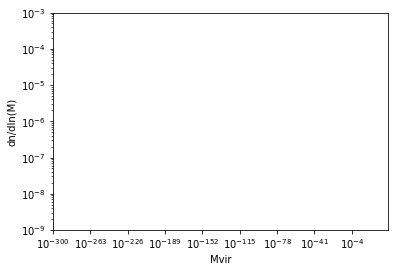

In [7]:
from colossus_dev_rseppi.colossus.lss import mass_function
from colossus.cosmology import cosmology
cosmology.setCosmology('multidark-planck')

z = [0.0, 0.5, 1.0, 1.5]
M = 10**np.arange(13.5, 15.5, 0.1)

plt.figure()
plt.xlabel('Mvir')
plt.ylabel('dn/dln(M)')
plt.loglog()
plt.ylim(1E-9, 1E-3)
for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = 'vir', model = 'seppi20', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

The seppi20 model includes a dependence on the offset parameter, i.e. the displacement between the halo center of mass and the peak of its mass profile, and the Peebles spin parameter. These can be specified with the boolean variables int_over_xoff and int_over_spin. Let's see some examples.

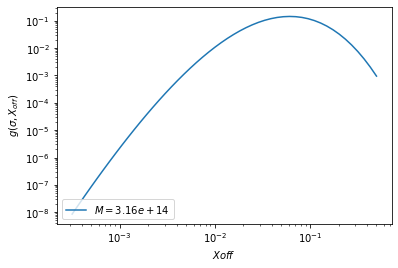

In [40]:
z = 0.0
M = 10**np.arange(13.5, 15.5, 0.1)
xoff = np.logspace(-3.5, -0.3, 50)
spin = np.logspace(-3.5, -0.3, 50)

plt.figure()
plt.loglog()
plt.xlabel('$Xoff$')
plt.ylabel('$g(\sigma,X_{off})$')

g_sigma_xoff = mass_function.massFunction(M, z, xoff=xoff, mdef = 'vir', model = 'seppi20', int_over_xoff = False) 
plt.plot(xoff,g_sigma_xoff[int(len(M)/2),:],label=r'$M = %.3g$'%(M[int(len(M)/2)]))

plt.legend(loc = 3);

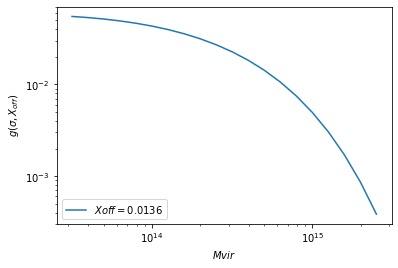

In [41]:
plt.figure()
plt.loglog()
plt.xlabel('$Mvir$')
plt.ylabel('$g(\sigma,X_{off})$')

g_sigma_xoff = mass_function.massFunction(M, z, xoff=xoff, mdef = 'vir', model = 'seppi20', int_over_xoff = False) 
plt.plot(M,g_sigma_xoff[:,int(len(xoff)/2)],label=r'$Xoff = %.3g$'%(xoff[int(len(xoff)/2)]))

plt.legend(loc = 3);

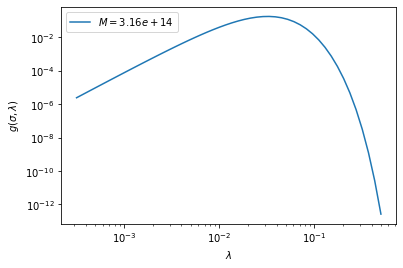

In [42]:
plt.figure()
plt.loglog()
plt.xlabel('$\lambda$')
plt.ylabel('$g(\sigma,\lambda)$')

g_sigma_spin = mass_function.massFunction(M, z, spin=spin, mdef = 'vir', model = 'seppi20', int_over_spin = False) 
plt.plot(xoff,g_sigma_spin[int(len(M)/2),:],label=r'$M = %.3g$'%(M[int(len(M)/2)]))

plt.legend();

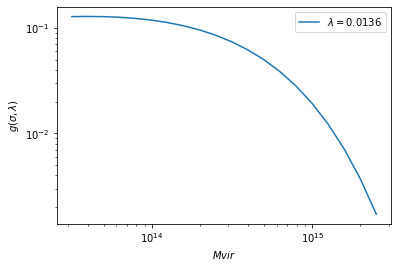

In [43]:
plt.figure()
plt.loglog()
plt.xlabel('$Mvir$')
plt.ylabel('$g(\sigma,\lambda)$')

g_sigma_spin = mass_function.massFunction(M, z, spin=spin, mdef = 'vir', model = 'seppi20', int_over_spin = False) 
plt.plot(M,g_sigma_spin[:,int(len(spin)/2)],label=r'$\lambda = %.3g$'%(spin[int(len(spin)/2)]))

plt.legend();

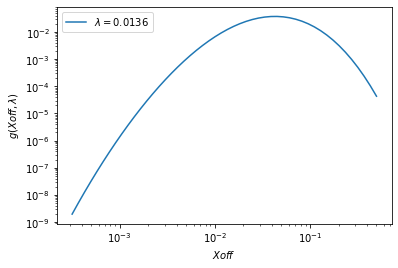

In [44]:
plt.figure()
plt.loglog()
plt.xlabel('$Xoff$')
plt.ylabel('$g(Xoff,\lambda)$')

g_xoff_spin = mass_function.massFunction(M, z, xoff=xoff, spin=spin, mdef = 'vir', model = 'seppi20', int_over_sigma=True, int_over_xoff=False, int_over_spin = False) 
plt.plot(xoff,g_xoff_spin[:,int(len(spin)/2)],label=r'$\lambda = %.3g$'%(spin[int(len(spin)/2)]))

plt.legend();

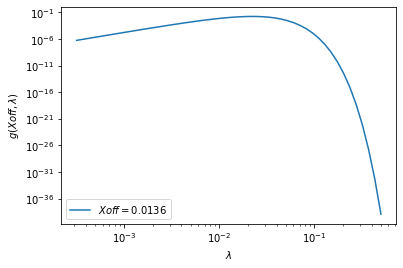

In [45]:
plt.figure()
plt.loglog()
plt.xlabel('$\lambda$')
plt.ylabel('$g(Xoff,\lambda)$')

g_xoff_spin = mass_function.massFunction(M, z, xoff=xoff, spin=spin, mdef = 'vir', model = 'seppi20', int_over_sigma=True, int_over_xoff=False, int_over_spin = False) 
plt.plot(spin,g_xoff_spin[int(len(xoff)/2),:],label=r'$Xoff = %.3g$'%(xoff[int(len(xoff)/2)]))

plt.legend();

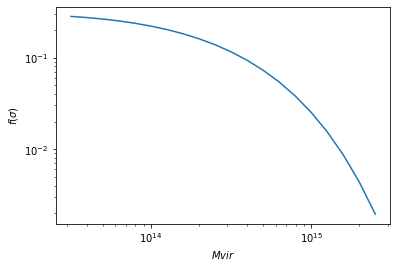

In [46]:
plt.figure()
plt.loglog()
plt.xlabel('$Mvir$')
plt.ylabel('$f(\sigma)$')

f_sigma = mass_function.massFunction(M, z, xoff=xoff, spin=spin, mdef = 'vir', model = 'seppi20') 
plt.plot(M,f_sigma)

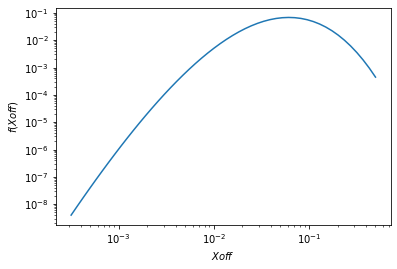

In [47]:
plt.figure()
plt.loglog()
plt.xlabel('$Xoff$')
plt.ylabel('$f(Xoff)$')

f_xoff = mass_function.massFunction(M, z, xoff=xoff, spin=spin, mdef = 'vir', model = 'seppi20', int_over_xoff=False, int_over_sigma = True) 
plt.plot(xoff,f_xoff)

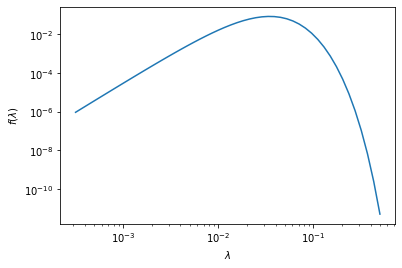

In [48]:
plt.figure()
plt.loglog()
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda)$')

f_spin = mass_function.massFunction(M, z, xoff=xoff, spin=spin, mdef = 'vir', model = 'seppi20', int_over_spin=False, int_over_sigma = True) 
plt.plot(spin,f_spin)